## imports

In [0]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

## HW: Chroma keying

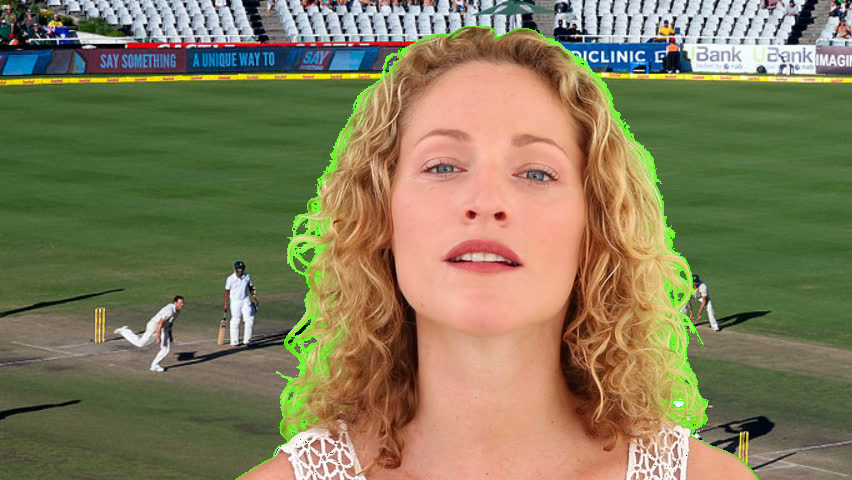

In [6]:
fg = cv2.imread('chroma_img.jpg')
bg = cv2.imread('stadium.jpg')
for i in range(fg.shape[0]):
  for j in range(fg.shape[1]):
    if fg[i,j,1]==255:
      # [6, 255, 31]
      fg[i,j] = bg[i,j]

cv2_imshow(fg)

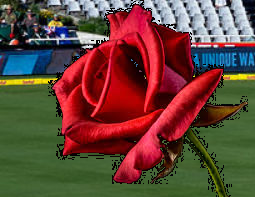

In [10]:
fg = cv2.imread('rose.jpeg')
bg = cv2.imread('stadium.jpg')
thresh = 7
for i in range(fg.shape[0]):
  for j in range(fg.shape[1]):
    if fg[i,j,0]<thresh and fg[i,j,1]<thresh and fg[i,j,2]<thresh:
      fg[i,j] = bg[i,j]

cv2_imshow(fg)

## HW: Perspective Transformation

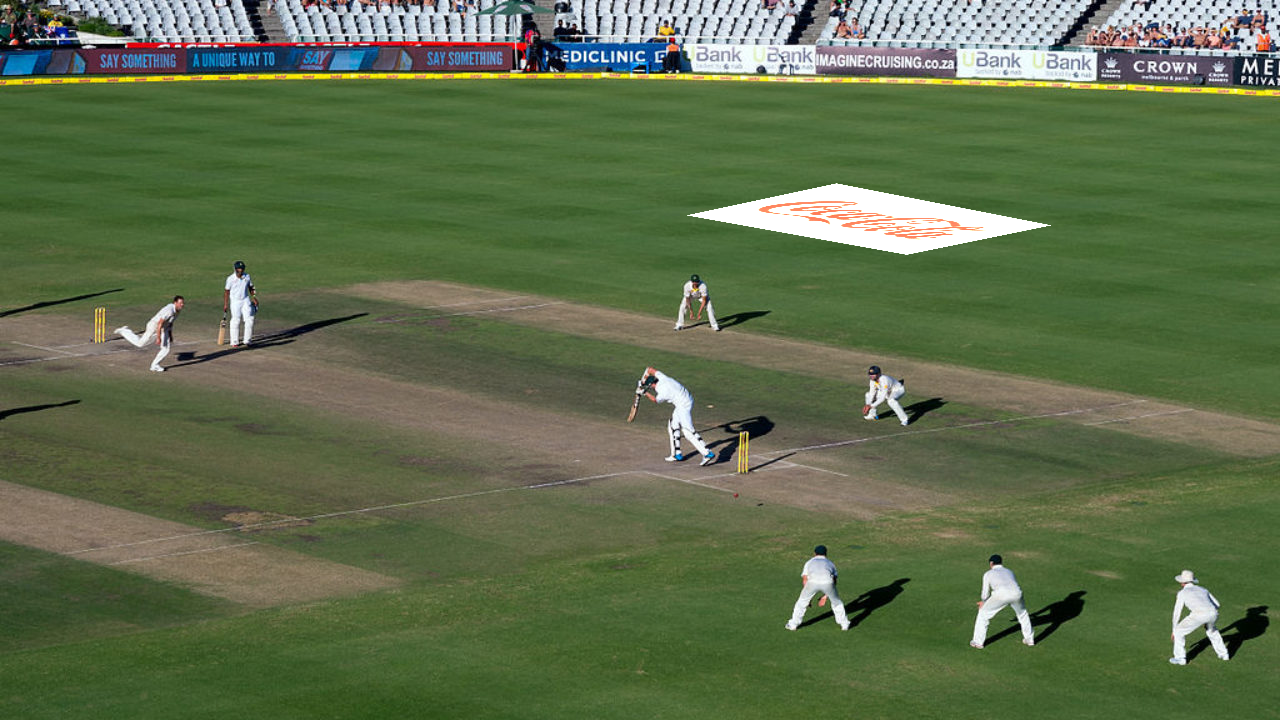

In [0]:
coca = cv2.imread('coca.jpg')
stad = cv2.imread('stadium.jpg')

points1 = np.float32([[0,0],[0,179],[320,0],[179,320]])
points2 = np.float32([[836,183],[686,215],[1051,225],[700,261]])
m = cv2.getPerspectiveTransform(points1, points2)

coca_homo = cv2.warpPerspective(coca, m, (1280, 720))
merge = cv2.add(coca_homo, stad)
cv2_imshow(merge)

## Face Alignment

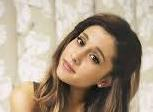

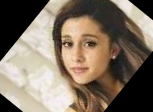

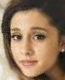

In [0]:
import math
img = cv2.imread('tilted_face.jpg')
rows,cols,ch = img.shape

x = [82, 42]  # left eye
y = [95, 58]  # right eye
z = [100, 42] # same y as x

a = [z[0]-x[0], z[1]-x[1]]
b = [y[0]-x[0], y[1]-x[1]]

adotb = a[0]*b[0] + a[1]*b[1]
ab = math.sqrt(a[0]**2 + a[1]**2) * math.sqrt(b[0]**2 + b[1]**2)
angle = math.degrees(math.acos(adotb/ab))

R = cv2.getRotationMatrix2D((cols/2,rows/2),angle,1)
imgr = cv2.warpAffine(img,R,(cols,rows))

crop = imgr[7:87, 51:116, :]

cv2_imshow(img)
cv2_imshow(imgr)
cv2_imshow(crop)